In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [5]:
titanic = pd.read_csv('tested.csv')
titanic.head().style.set_properties(
    **{
        'background-color': 'LightBlue',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,nan,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,nan,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,nan,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,nan,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,nan,S


In [6]:
print('Shape of Titanic data set is :',titanic.shape)
print('Size of Titanic data set is  :',titanic.size)

Shape of Titanic data set is : (418, 12)
Size of Titanic data set is  : 5016


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


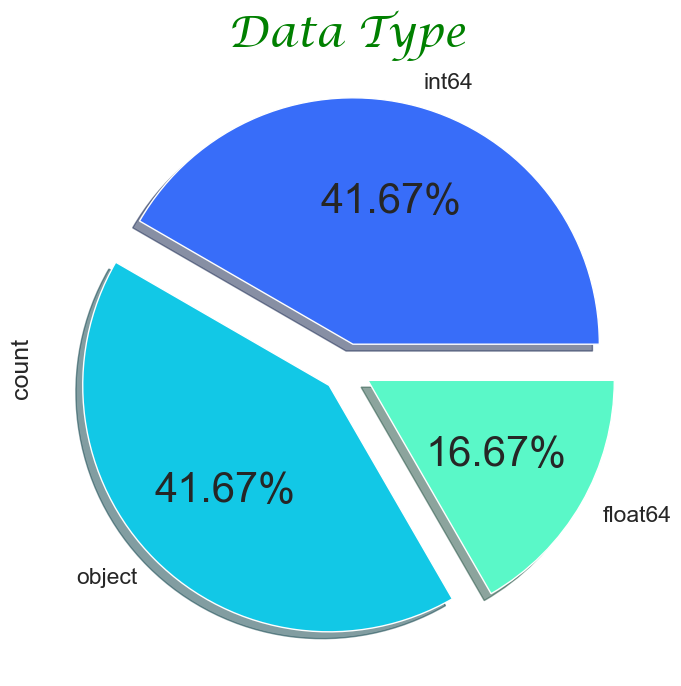

In [9]:
matplotlib.rcParams.update({'font.size': 30})

titanic.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',
          font='Lucida Calligraphy');

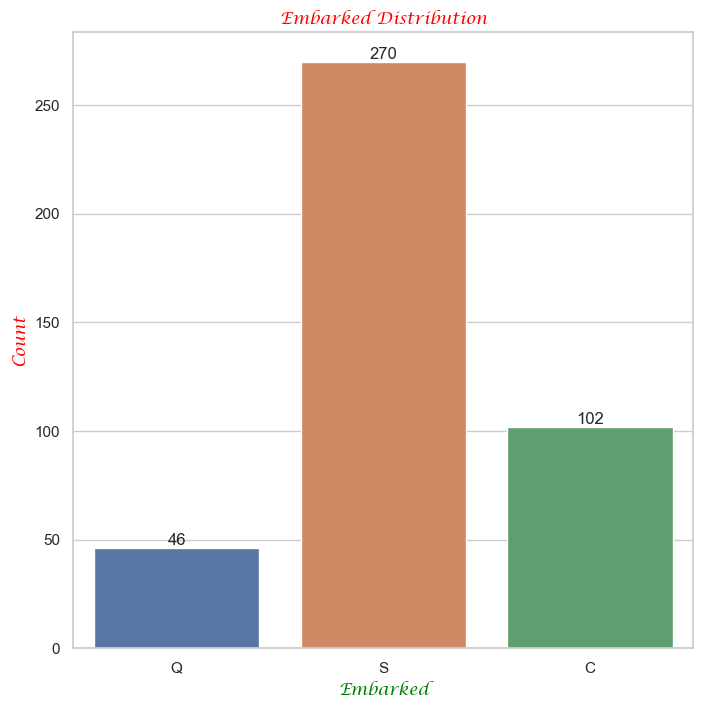

In [10]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=titanic,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center',font='Lucida Calligraphy');
plt.xlabel('Embarked',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

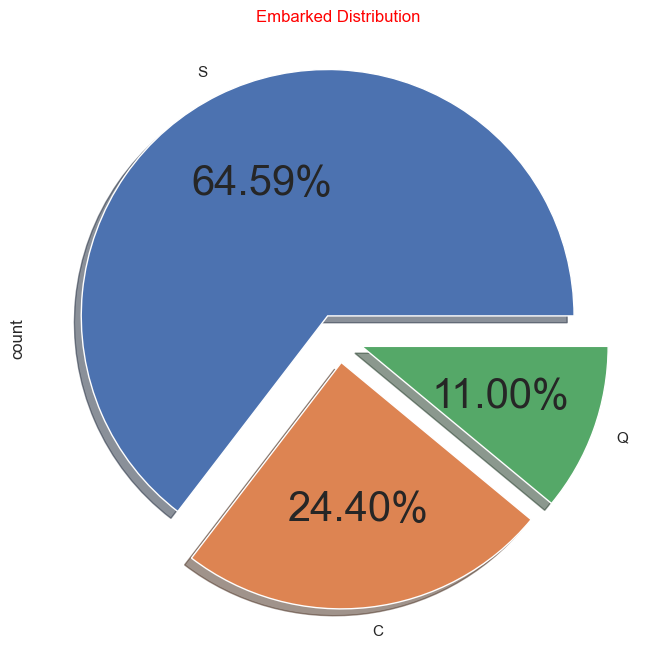

In [11]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');

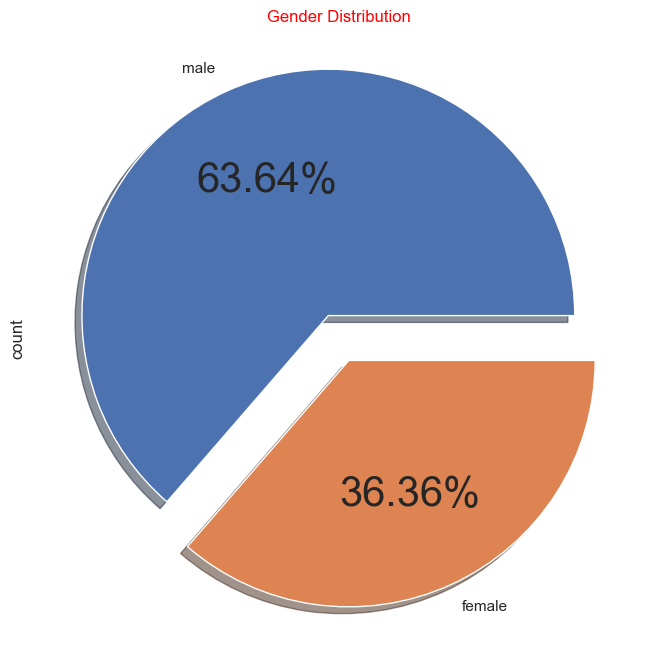

In [12]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

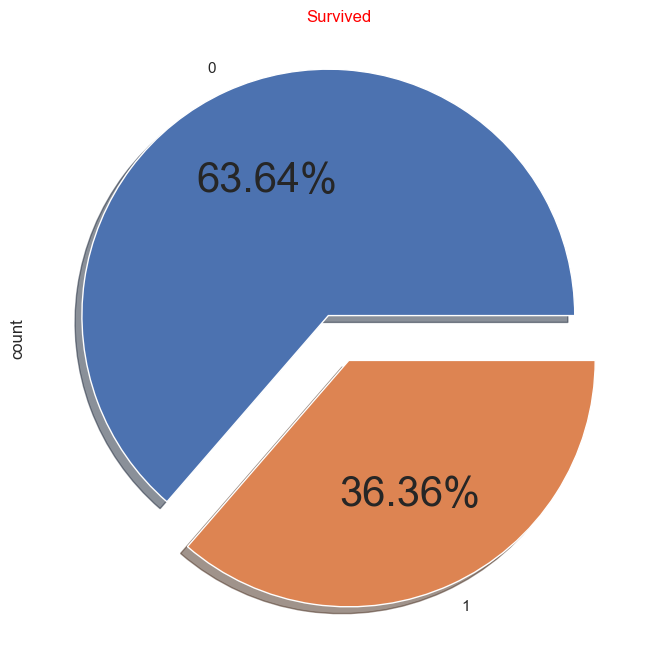

In [13]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

In [16]:
titanic.select_dtypes(include=['number']).corr().style.background_gradient(cmap='coolwarm').format(precision=3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.023,-0.027,-0.034,0.004,0.043,0.008
Survived,-0.023,1.000,-0.109,-0.000,0.100,0.159,0.192
Pclass,-0.027,-0.109,1.000,-0.492,0.001,0.019,-0.577
Age,-0.034,-0.000,-0.492,1.000,-0.092,-0.061,0.338
SibSp,0.004,0.100,0.001,-0.092,1.000,0.307,0.172
Parch,0.043,0.159,0.019,-0.061,0.307,1.000,0.230
Fare,0.008,0.192,-0.577,0.338,0.172,0.230,1.000


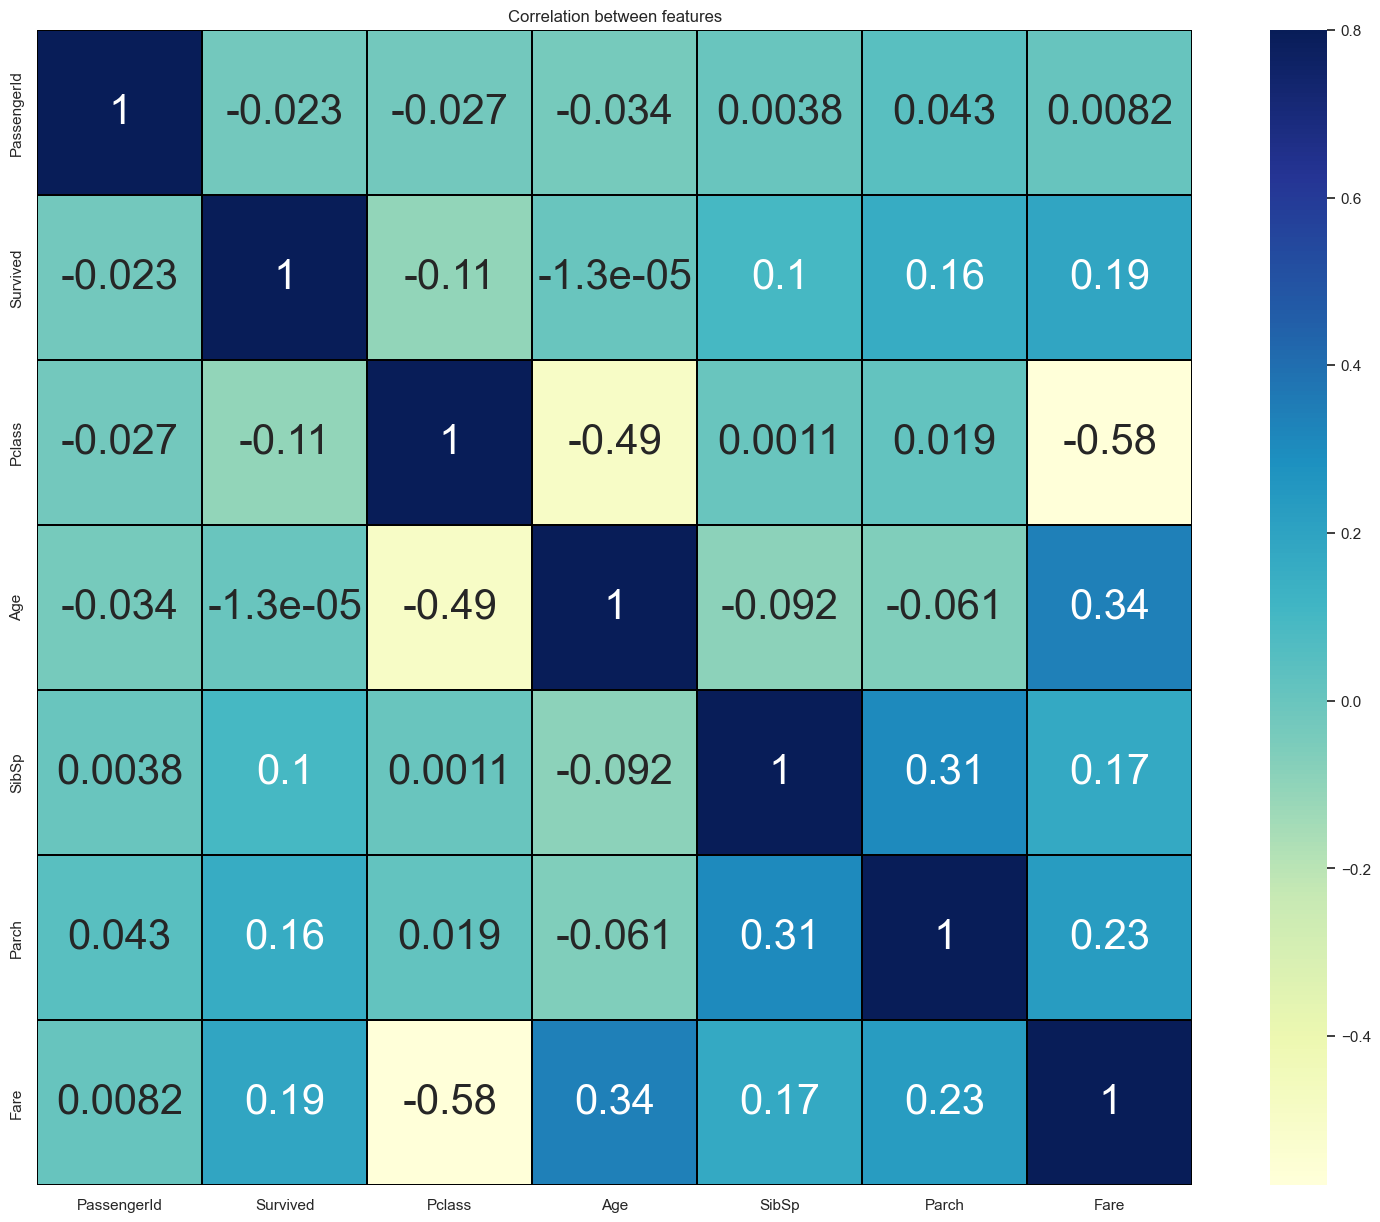

In [18]:
corr = titanic.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()


In [20]:
# Correlation heatmap of highly correlated features with Fare
numeric_titanic = titanic.select_dtypes(include=['number'])
hig_corr = numeric_titanic.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
print(hig_corr_features)


Index(['Pclass', 'Age', 'Fare'], dtype='object')


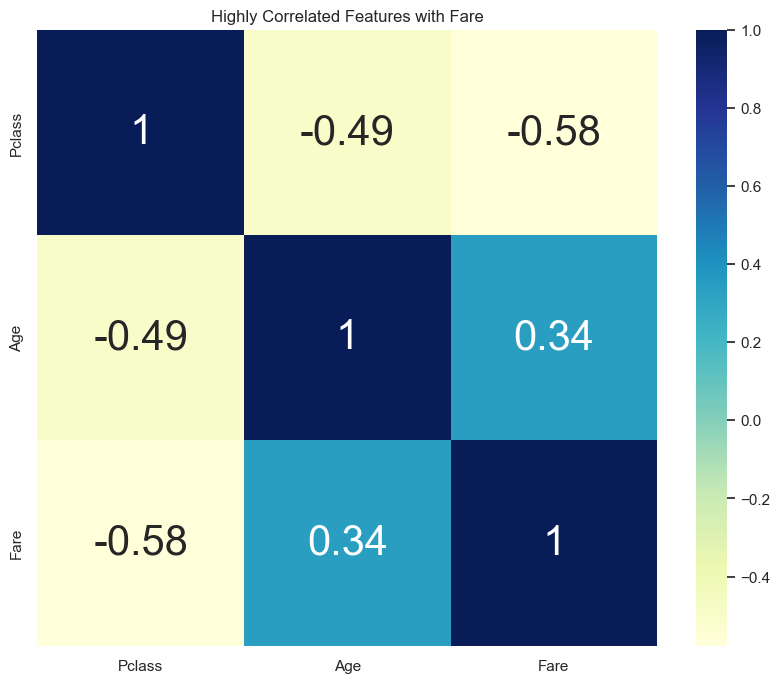

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_titanic[hig_corr_features].corr(), annot=True, cmap='YlGnBu')
plt.title('Highly Correlated Features with Fare')
plt.show()

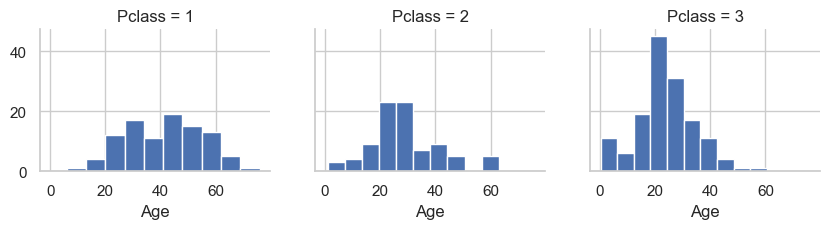

In [22]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

In [23]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [25]:
missing_value(titanic).style.background_gradient(cmap='coolwarm').format(precision=2)

,Missing Number,Missing Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


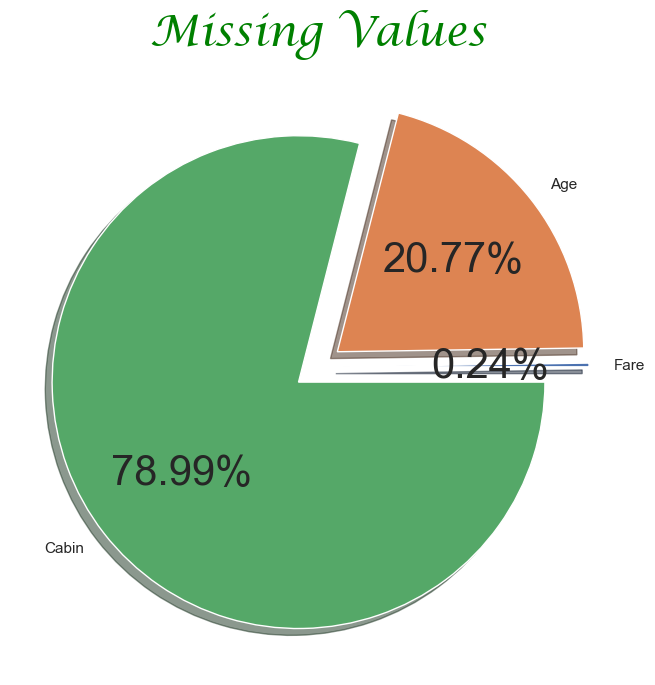

In [26]:
missing_values = titanic.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1, 0.1, 0.1],
                        autopct='%1.2f%%',
                        shadow=True)

plt.title('Missing Values',
          color='Green',
          loc='center',
          font='Lucida Calligraphy');

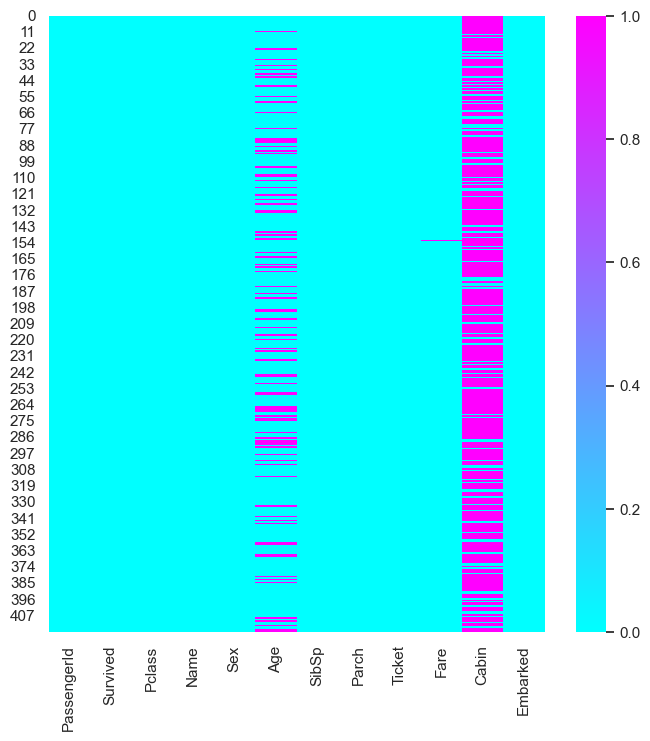

In [27]:
sns.heatmap(titanic.isnull(),cmap='cool');

In [29]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


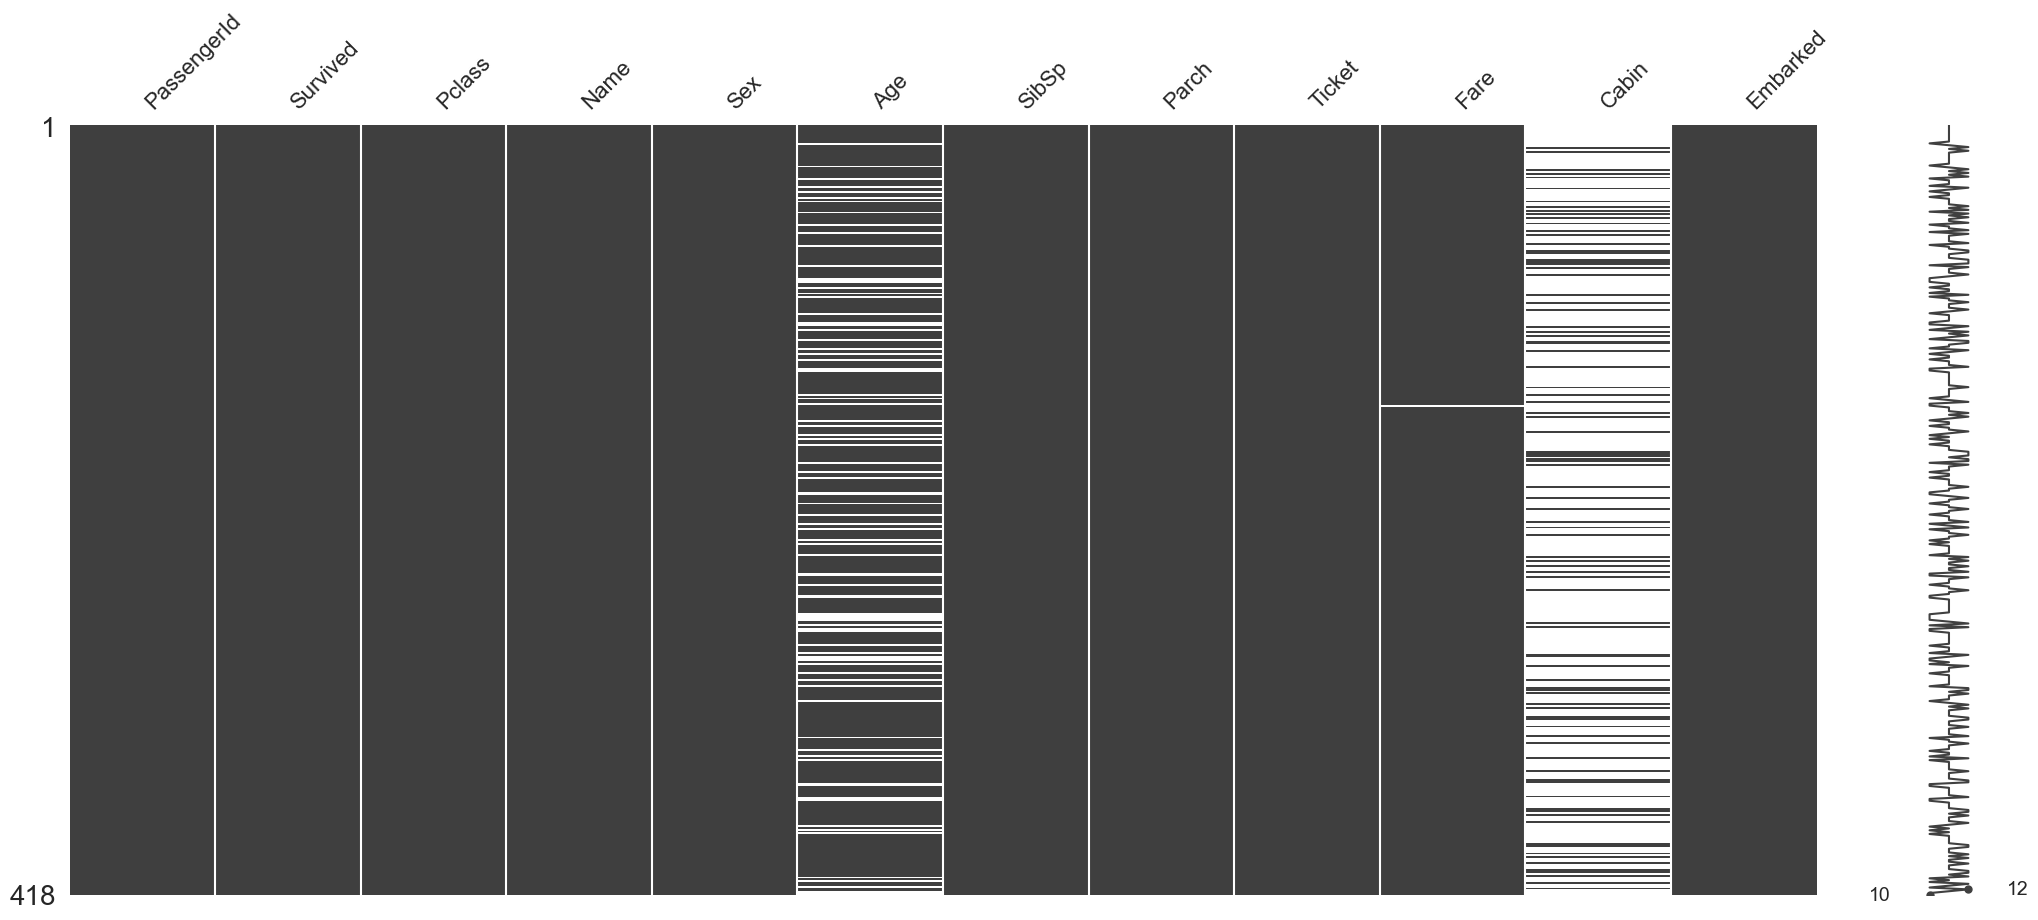

In [30]:
import missingno as msno
msno.matrix(titanic)
plt.show()

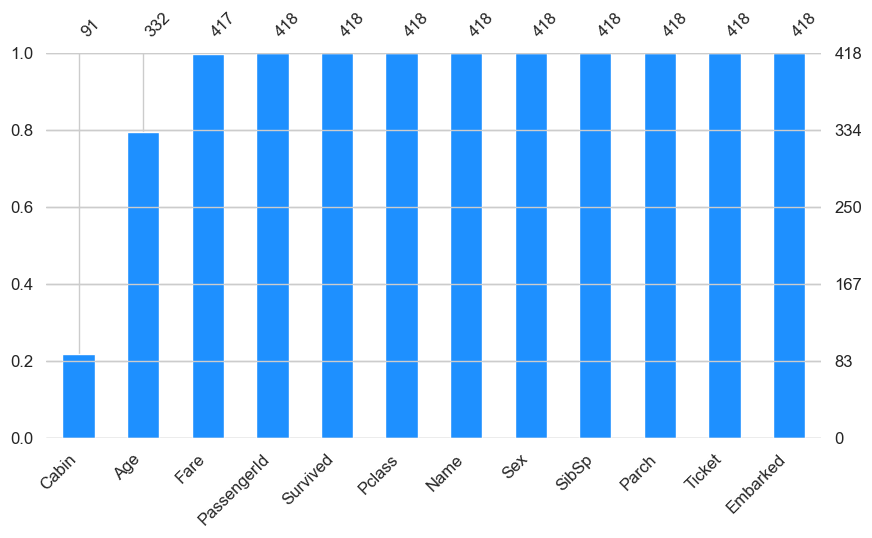

In [31]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

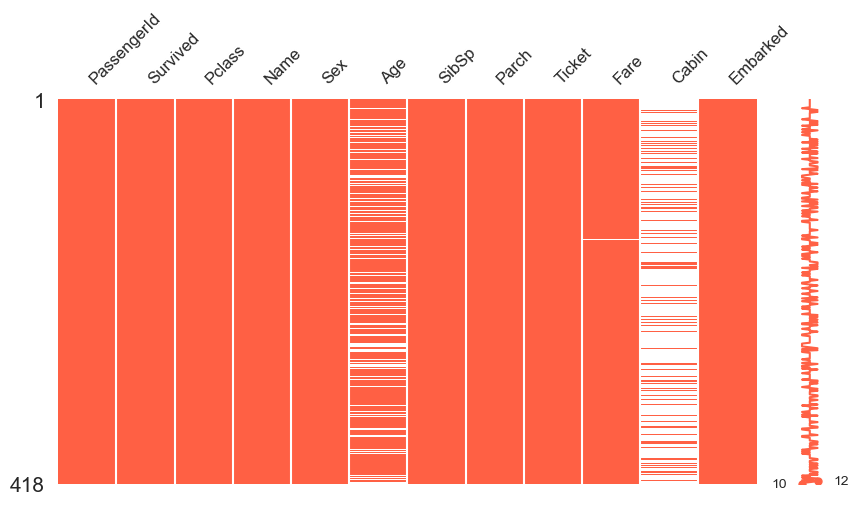

In [32]:
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

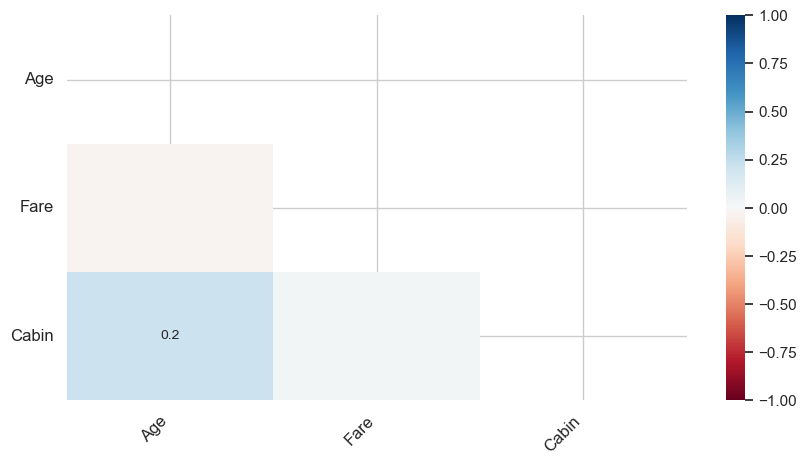

In [33]:
missingno.heatmap(titanic, figsize=(10,5), fontsize=12);

In [34]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [35]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
titanic['Embarked'] = titanic['Embarked'].fillna(method='bfill')

In [37]:
titanic = titanic.drop(['Cabin'],axis=1)

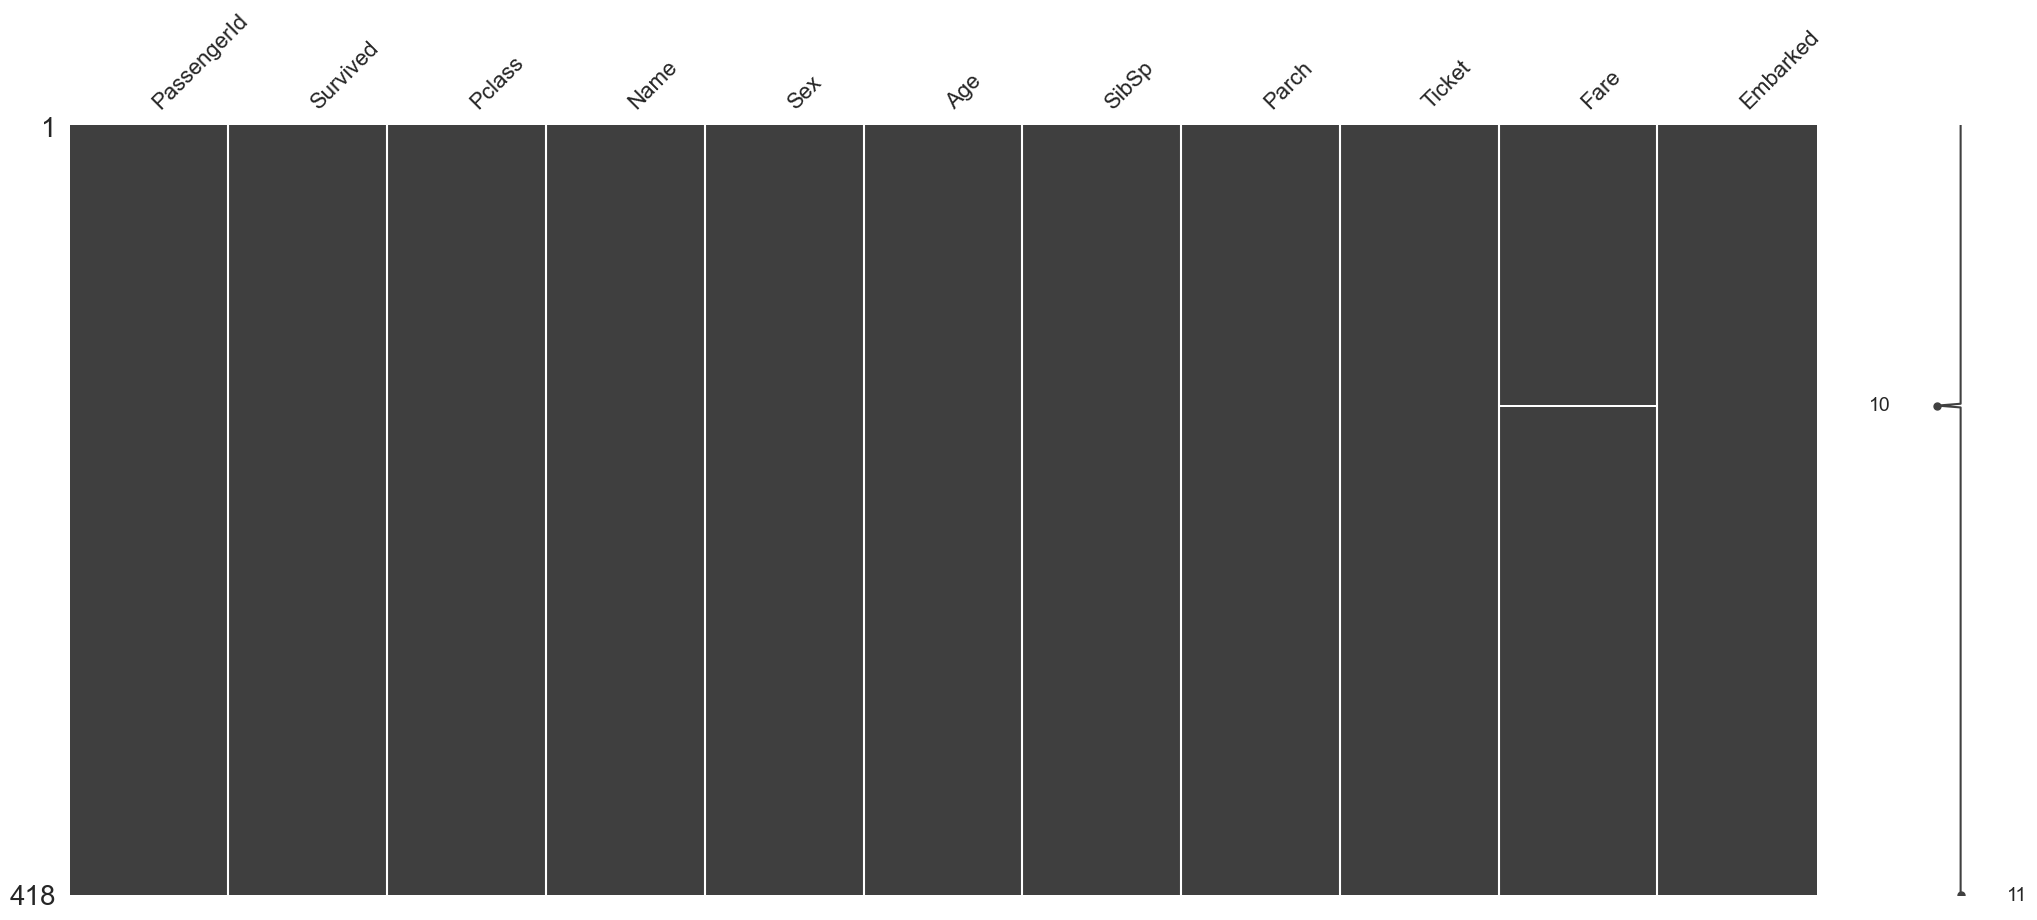

In [38]:
import missingno as msno
msno.matrix(titanic)
plt.show()

In [39]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [40]:
titanic = titanic.drop(['Name','Ticket'],axis=1)

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [42]:
titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [43]:
X = titanic.drop(['Survived'],axis=1) 
y = titanic['Survived']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [46]:
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.519844,-1.485927,-0.648907,-0.490615,0.610805,0.417416,-1.318220,-0.347571,-1.344144
1,-0.806757,0.871791,-0.918932,-0.490615,-0.435395,-0.507235,-1.318220,2.877113,-1.344144
2,1.562004,-1.485927,-0.648907,-0.490615,0.610805,0.373814,-1.318220,-0.347571,-1.344144
3,-0.585454,0.871791,-1.574708,4.829691,1.657005,0.162498,-1.318220,-0.347571,0.743968
4,0.004687,-0.307068,-1.034657,-0.490615,-0.435395,0.612179,0.758599,-0.347571,0.743968


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.282149,0.871791,-1.574708,3.765630,0.610805,-0.137994,0.758599,2.877113,-1.344144
1,0.225990,-1.485927,1.356995,0.573446,-0.435395,1.168786,-1.318220,-0.347571,-1.344144
2,0.103044,-1.485927,1.742746,-0.490615,-0.435395,-0.166381,-1.318220,-0.347571,-1.344144
3,1.348898,0.871791,-0.648907,1.637507,-0.435395,-0.483919,-1.318220,-0.347571,0.743968
4,-0.290383,-0.307068,-0.803207,-0.490615,-0.435395,-0.009091,-1.318220,-0.347571,0.743968


In [62]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 65.66
Model Accuracy Score : 66.67


In [63]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 64.15
Model Accuracy Score  : 66.67


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 74.72
Model Accuracy Score  : 61.11


In [65]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 54.34
Model Accuracy Score  : 44.44


In [66]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)


Training Accuracy    : 62.26
Model Accuracy Score : 72.22


In [67]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)

Training Accuracy    : 65.66
Model Accuracy Score : 66.67


In [68]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)



Training Accuracy     : 62.26
Model Accuracy Score  : 55.56


In [69]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 61.11


In [70]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 66.67


In [71]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)

Training Accuracy     : 72.45
Model Accuracy Score  : 55.56


In [73]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 495.5 kB/s eta 0:05:03
   ---------------------------------------- 0.2/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.3/150.0 MB 1.9 MB/s eta 0:01:19
   ---------------------------------------- 0.4/150.0 MB 2.3 MB/s eta 0:01:05
   ---------------------------------------- 0.7/150.0 MB 2.9 MB/s eta 0:00:51
   ---------------------------------------- 1.0/150.0 MB 3.3 MB/s eta 0:00:46
   ---------------------------------------- 1.2/150.0 MB 3.4 MB/s eta 0:00:44
   ---------------------------------------- 1.4/150.0 MB 3.6 MB/s eta 0:00:41
   -----------------------

In [74]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)

Training Accuracy     : 99.62
Model Accuracy Score  : 61.11


In [75]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

In [76]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
7,Decision Tree,100.00,61.11
8,GaussianNB,100.00,66.67
10,XGBClassifier,99.62,61.11
2,Logistic Regression,74.72,61.11
9,MLPClassifier,72.45,55.56
0,Support Vector Machines,65.66,66.67
5,Stochastic Gradient Decent,65.66,66.67
1,KNN,64.15,66.67
4,Perceptron,62.26,72.22
6,Linear SVC,62.26,55.56


In [80]:
models.sort_values(by='Model Accuracy Score', ascending=False).style \
    .background_gradient(cmap='coolwarm') \
    .set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'Black',
        'font-size': '15px'
    }) \
    .set_table_styles([{
        'selector': 'thead th', 
        'props': [('text-align', 'center')]
    }, {
        'selector': 'tr',
        'props': [('text-align', 'center')]
    }, {
        'selector': 'th', 
        'props': [('border', '1px solid black')]
    }]) \
    .hide(axis="index")  # This hides the index


Model,Training Accuracy,Model Accuracy Score
Perceptron,62.260000,72.220000
Support Vector Machines,65.660000,66.670000
KNN,64.150000,66.670000
Stochastic Gradient Decent,65.660000,66.670000
GaussianNB,100.000000,66.670000
Logistic Regression,74.720000,61.110000
Decision Tree,100.000000,61.110000
XGBClassifier,99.620000,61.110000
Linear SVC,62.260000,55.560000
MLPClassifier,72.450000,55.560000


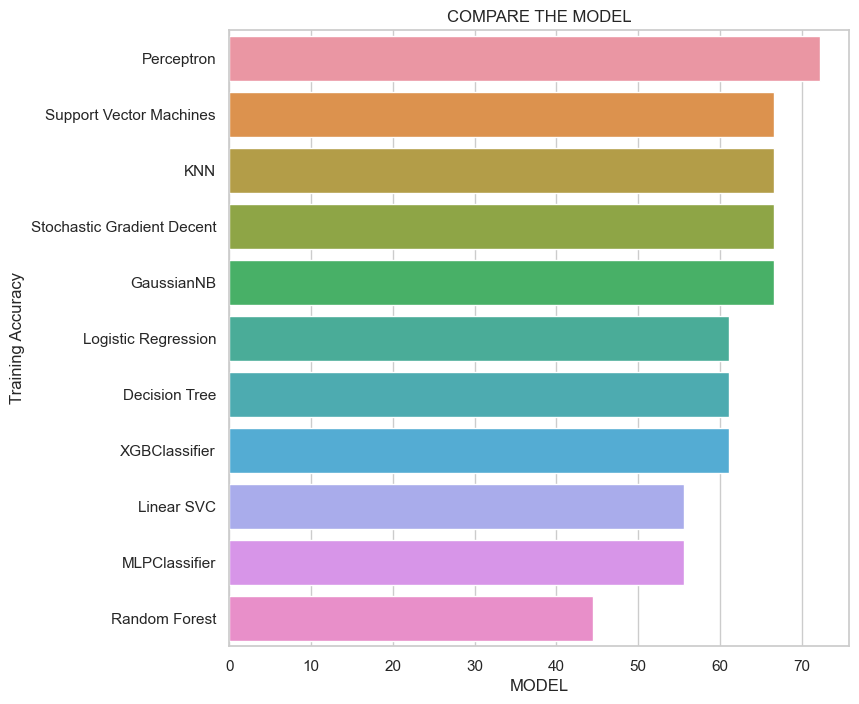

In [81]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:20]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

In [82]:
from sklearn.ensemble import RandomForestClassifier

y = titanic["Survived"]

features = ["Pclass", "SibSp", "Parch"]
X = pd.get_dummies(titanic[features])
X_test = pd.get_dummies(titanic[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': titanic.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
